In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR= r'D:\face_emotion_detection\archive\images\train'
TEST_DIR=r'D:\face_emotion_detection\archive\images\test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels
    

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                                   image     label
0      D:\face_emotion_detection\archive\images\train...     angry
1      D:\face_emotion_detection\archive\images\train...     angry
2      D:\face_emotion_detection\archive\images\train...     angry
3      D:\face_emotion_detection\archive\images\train...     angry
4      D:\face_emotion_detection\archive\images\train...     angry
...                                                  ...       ...
28816  D:\face_emotion_detection\archive\images\train...  surprise
28817  D:\face_emotion_detection\archive\images\train...  surprise
28818  D:\face_emotion_detection\archive\images\train...  surprise
28819  D:\face_emotion_detection\archive\images\train...  surprise
28820  D:\face_emotion_detection\archive\images\train...  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)

                                                  image     label
0     D:\face_emotion_detection\archive\images\test\...     angry
1     D:\face_emotion_detection\archive\images\test\...     angry
2     D:\face_emotion_detection\archive\images\test\...     angry
3     D:\face_emotion_detection\archive\images\test\...     angry
4     D:\face_emotion_detection\archive\images\test\...     angry
...                                                 ...       ...
7061  D:\face_emotion_detection\archive\images\test\...  surprise
7062  D:\face_emotion_detection\archive\images\test\...  surprise
7063  D:\face_emotion_detection\archive\images\test\...  surprise
7064  D:\face_emotion_detection\archive\images\test\...  surprise
7065  D:\face_emotion_detection\archive\images\test\...  surprise

[7066 rows x 2 columns]


In [8]:
from tqdm.notebook import tqdm

In [14]:
from keras_preprocessing.image import load_img
import numpy as np
from tqdm import tqdm

def extract_features(image_paths):
    features = []
    for image_path in tqdm(image_paths):
        img = load_img(image_path, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    return features

# Assuming 'image' is the correct column name containing the file paths
train_features = extract_features(train['image'])


100%|███████████████████████████████████████████████████████████████████████████| 28821/28821 [00:41<00:00, 686.78it/s]


In [15]:
train_features = extract_features(train['image'])

100%|██████████████████████████████████████████████████████████████████████████| 28821/28821 [00:15<00:00, 1913.34it/s]


In [19]:
from keras_preprocessing.image import load_img
import numpy as np
from tqdm import tqdm

def extract_features(image_paths):
    features = []
    for image_path in tqdm(image_paths):
        img = load_img(image_path, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    return features

# Assuming 'image' is the correct column name containing the file paths
test_features = extract_features(test['image'])


100%|████████████████████████████████████████████████████████████████████████████| 7066/7066 [00:03<00:00, 1879.06it/s]


In [20]:
test_features = extract_features(test['image'])

100%|████████████████████████████████████████████████████████████████████████████| 7066/7066 [00:03<00:00, 1881.41it/s]


In [23]:
from keras_preprocessing.image import load_img
import numpy as np
from tqdm import tqdm

def extract_features(image_paths):
    features = []
    for image_path in tqdm(image_paths):
        img = load_img(image_path, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    return np.array(features)  # Convert the list of arrays to a single NumPy array

# Assuming 'image' is the correct column name containing the file paths
train_features = extract_features(train['image'])
test_features = extract_features(test['image'])

# Normalize the pixel values
x_train = train_features / 255.0
x_test = test_features / 255.0


100%|████████████████████████████████████████████████████████████████████████████| 7066/7066 [00:03<00:00, 1911.18it/s]


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [26]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [28]:
y_tain = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [29]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(7, activation='softmax'))

C:\Users\cdnai\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [32]:
model.fit(x=x_train,y=y_train, epochs=20, batch_size=128, validation_data=(x_test,y_test))


Epoch 1/20


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 7)

In [33]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [34]:
from keras.models import model_from_json

In [42]:
import json
from keras.models import model_from_json, Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
import os

# Define the function to process the image
def ef(image_path):
    # Verify the file exists
    if not os.path.isfile(image_path):
        raise FileNotFoundError(f"No such file: '{image_path}'")
    
    # Load the image
    image = cv2.imread(image_path)
    
    # Check if image was successfully loaded
    if image is None:
        raise ValueError(f"Failed to load image from path: '{image_path}'")
    
    # Convert the image to grayscale (assuming the model expects grayscale images)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Resize the image to the size expected by the model (assuming 48x48 pixels)
    image = cv2.resize(image, (48, 48))
    
    # Normalize pixel values to the range [0, 1]
    image = image.astype("float") / 255.0
    
    # Convert the image to a format suitable for the model (add batch dimension)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    
    return image


# Read the JSON file
json_path = r'D:\face_emotion_detection\facialemotionmodel.json'
weights_path = r'D:\face_emotion_detection\facialemotionmodel.h5'

with open(json_path, "r") as json_file:
    model_json = json_file.read()

# Ensure you have registered the Sequential model and other custom objects if any
model = model_from_json(model_json, custom_objects={'Sequential': Sequential})

# Load the weights
model.load_weights(weights_path)

# Compile the model (use the same settings as during training)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Example usage
image_path = r'D:\face_emotion_detection\archive\images\train\angry\1.jpg'
processed_image = ef(image_path)

# Make a prediction
prediction = model.predict(processed_image)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
[[0.21273917 0.0080637  0.20391542 0.04736727 0.12547506 0.35884643
  0.04359296]]


In [43]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [44]:
def ef(image):
    img = load_img(image,color_mode = "grayscale")
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [45]:
image = r'D:\face_emotion_detection\archive\images\train\angry/22.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
model prediction is  angry


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
model prediction is  sad


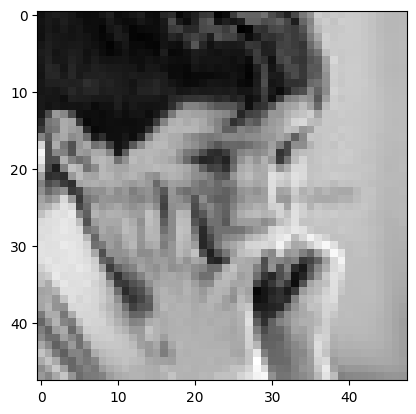

In [48]:
image = r'D:\face_emotion_detection\archive\images\train\sad/3.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
model prediction is  surprise


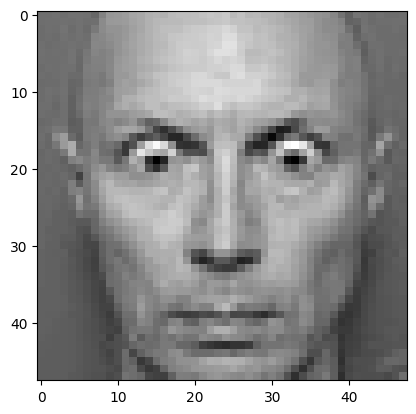

In [49]:
image = r'D:\face_emotion_detection\archive\images\train\surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
import cv2
from keras.models import model_from_json
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Load the model
json_file = open(r'D:\face_emotion_detection\facialemotionmodel.json', "r")
model_json = json_file.read()
json_file.close()

# Explicitly register the Sequential class and other necessary classes
model = model_from_json(model_json, custom_objects={
    'Sequential': Sequential,
    'Conv2D': Conv2D,
    'MaxPooling2D': MaxPooling2D,
    'Dropout': Dropout,
    'Flatten': Flatten,
    'Dense': Dense
})

model.load_weights( r'D:\face_emotion_detection\facialemotionmodel.h5')

# Load the face cascade
haar_file = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)

# Function to extract features
def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

# Initialize webcam
webcam = cv2.VideoCapture(0)
labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

try:
    while True:
        # Capture frame-by-frame
        ret, im = webcam.read()
        if not ret:
            break

        # Convert to grayscale
        gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

        # Detect faces
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (p, q, r, s) in faces:
            image = gray[q:q+s, p:p+r]
            cv2.rectangle(im, (p, q), (p+r, q+s), (255, 0, 0), 2)
            image = cv2.resize(image, (48, 48))
            img = extract_features(image)
            pred = model.predict(img)
            prediction_label = labels[np.argmax(pred)]
            cv2.putText(im, '%s' % prediction_label, (p, q-10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (0, 0, 255))
         

        # Display the resulting frame
        cv2.imshow('Output', im)

        # Break the loop on 'ESC' key press
        if cv2.waitKey(27) & 0xFF == 27:
            break

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    # When everything is done, release the capture
    webcam.release()
    cv2.destroyAllWindows()


C:\Users\cdnai\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━

In [1]:
import os
os.getcwd()

'C:\\Users\\cdnai'